In this notebook, we will guide you through the step-by-step process to start training using SmartScheduler and Google Cloud. Follow along with the instructions to set up your environment and leverage the power of SmartScheduler to efficiently manage your virtual machines for training tasks. Let's get started!

You can find more info here:
https://github.com/AIRI-Institute/SmartScheduler/

# Usage example. Tutorial on training with MNIST <a name="3"></a>
## Prerequisites:
Before you begin, make sure you have the following:

- Google Cloud Account: You will need a Google Cloud account to access and manage your virtual machines (VMs) on Google Cloud.
- ElectricityMaps Account: Sign up for an ElectricityMaps account, as it will be used to monitor and manage the energy consumption and CO2 emissions of the VMs.
- Master Machine Setup: In this tutorial, we will use Google Colab as the master machine to control the VMs.
- SSH and Terminal Access: Ensure that you have access to a terminal with SSH installed, as you will use this to interact with the VMs.

## Step 1. Setting up master machine.


In the case with Colab you don't need any venv, so just run the following code

In [1]:
!pip install smartscheduler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 418.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Step 2. Electricity Maps setup


Go to the [electricitymaps website](https://api-portal.electricitymaps.com/) and create an account. You may apply for free tier period (non-commercial use only) or subscribe to countries info.

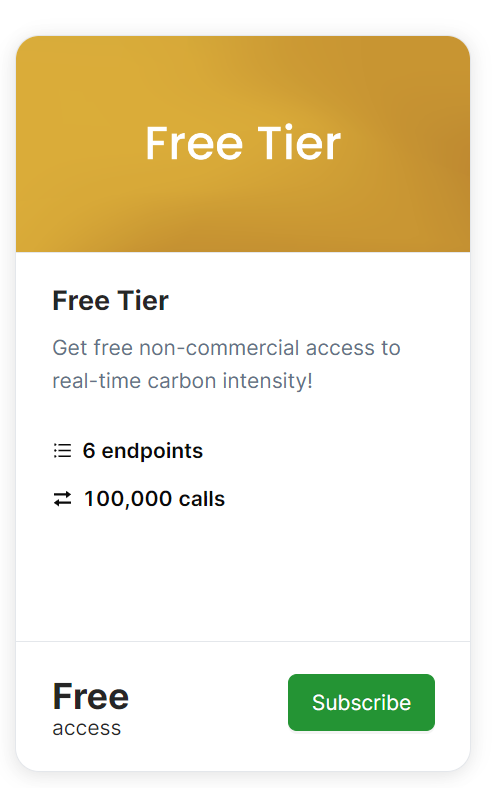


Then copy your primary API key. You will need it on Step 8.

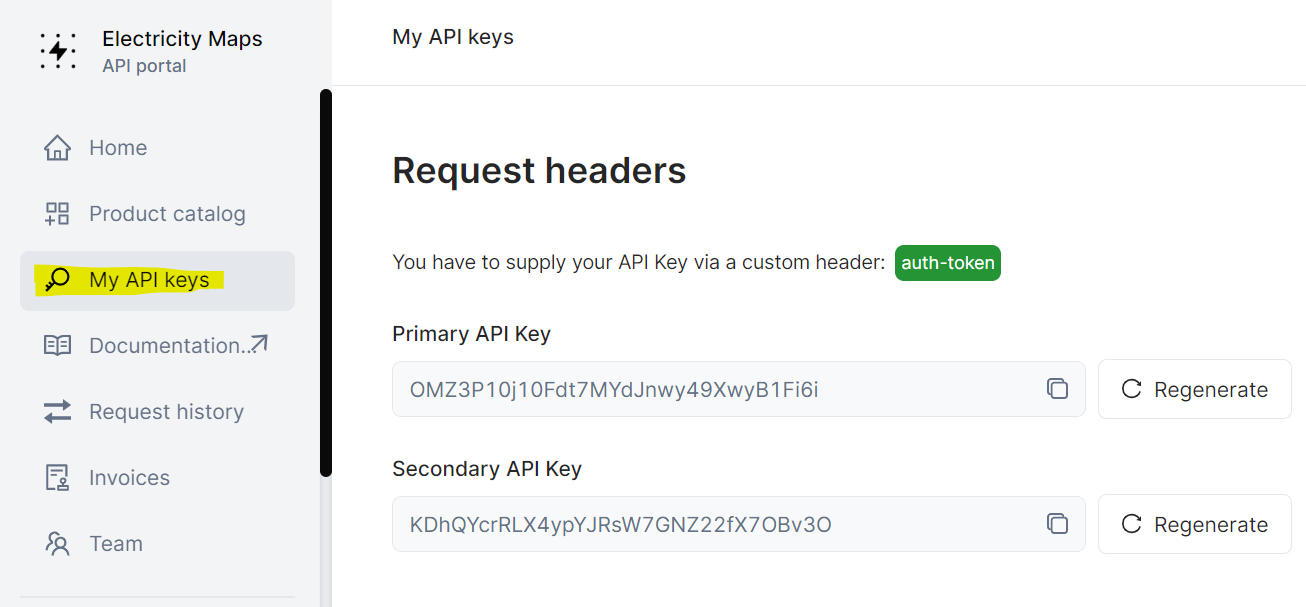


## Step 3. Google cloud. Project setup

### Creating a project

To setup you will need to go on [Google Cloud Console](https://console.cloud.google.com/) and create a project.

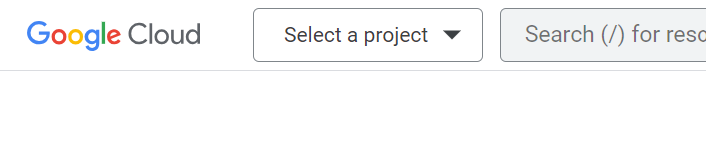

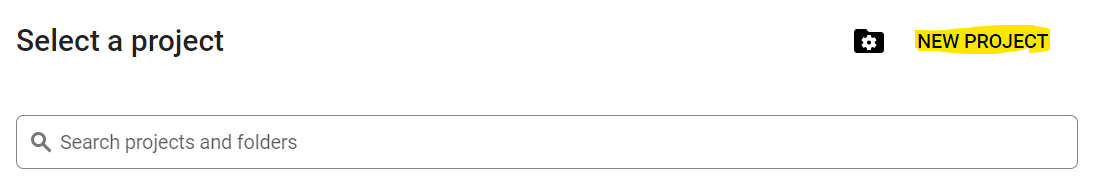


### Credentials setup

Choose your project and click on "Activate Cloud Shell" (top-right corner of the window). Execute a command and continue with instructions.

```
gcloud auth application-default login
```

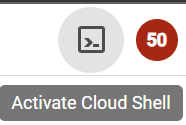

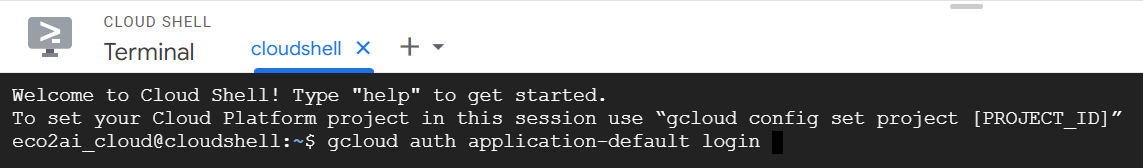



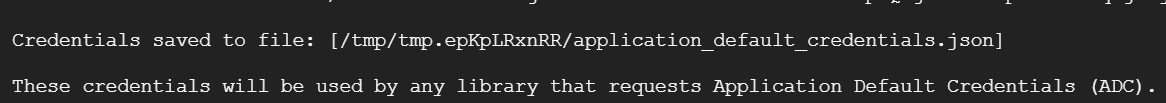


Download your `application_default_credentials.json` and place it in '/content/' folder.


### SSH Setup

The code below is for generating an SSH key. Copy the output of the code, and then proceed to the Cloud platform. You can do it [here](https://console.cloud.google.com/compute/metadata/sshKeys).

In [ ]:
!ssh-keygen -f /root/.ssh/id_rsa -q -N ""

In [ ]:
username = 'scheduler'
with open('/root/.ssh/id_rsa.pub', 'r') as f:
  sshkey = f.read()
print(sshkey.replace('root', username))

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABgQDbUoljoKj9P31AKyqD6d9ri4qPnLIyY/nwnxkY3/nrRbdhzfxn2oTZgJ+m8Ms2xOmpuEjwaT9M40v9FVWR7IbM9RAhhhrldY9l5QlNheTsUX46i1Ph81bGwkaDBDM4S2i5wp/3G3tpRZ4gdm5BmyRrWjE3KeOg4HBBo/vgg3yCtEfD6pORTu+fUL2qwrrFtLuu4auEGaxufe3R0SQxx7/SjT44VfokAeXe5TQ+f8dK4mjJmhS2wruGbufduCdlBYzu2raXEHIwbeF/kx2ykJeYzFYJ7PK2lmyExM/r9+iylchLlE8H5aC9KuSSPGahhlHOx9yRd5ZETGB9FK1pM0Ux2nIP1IB5/xhjbXnFbsIc0lJ9tOzwoBBbiv3HlBvIs5mYFOl1quMEdXfXa1kEDTzCAE2QnP1vZHTQDlP5XdyrDKFQM64RGKBhmjtsGbx+A++JJkGy2YSBdx4oBre6/dCZc6noH2a+cdwUosKuKIEAHLXidUPaJE1M/xWpxXvv+5M= scheduler@03a3c5aef307




If you are using Colab, set up the Colab SSH key, and also add your local SSH key to ensure access to your virtual machine (VM) at a later stage.

By setting up SSH keys for your project, you will be able to securely access and manage your VMs on the Cloud platform. This is an essential step to ensure the safety and integrity of your virtual infrastructure.





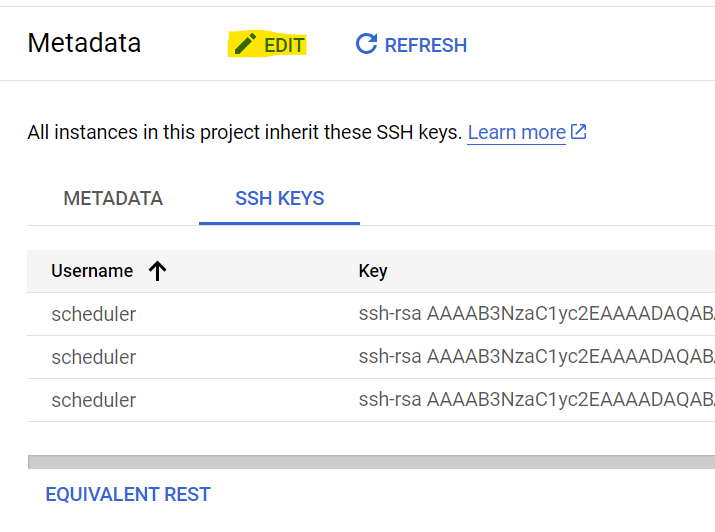

## Step 4. Google Cloud. Creating VM


Create a VM in "Compute Engine" section on Google Cloud.


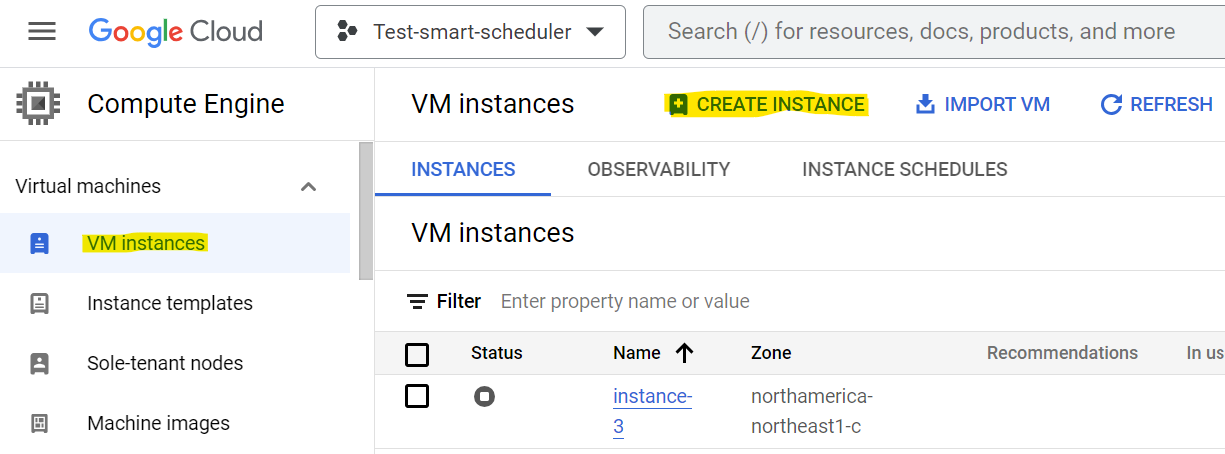


Choose a zone for your VM. In this tutorial, we will create it in the "northamerica-northeast1-c" zone.

For the CPU, we have selected the E2 configuration. This configuration is optimized for general-purpose computing tasks.

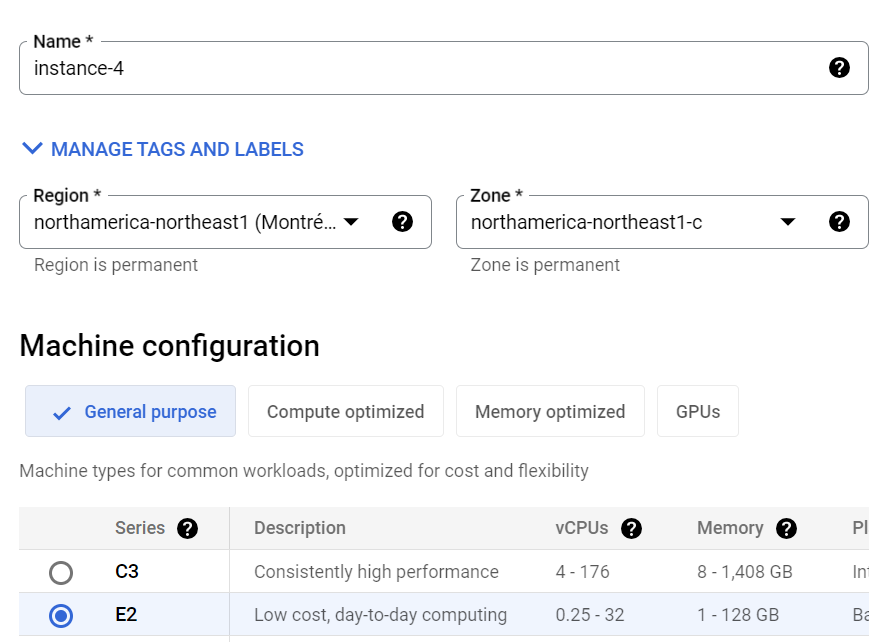


Regarding the operating system (OS), we have opted to use Ubuntu Minimal with a 25 GB hard drive.

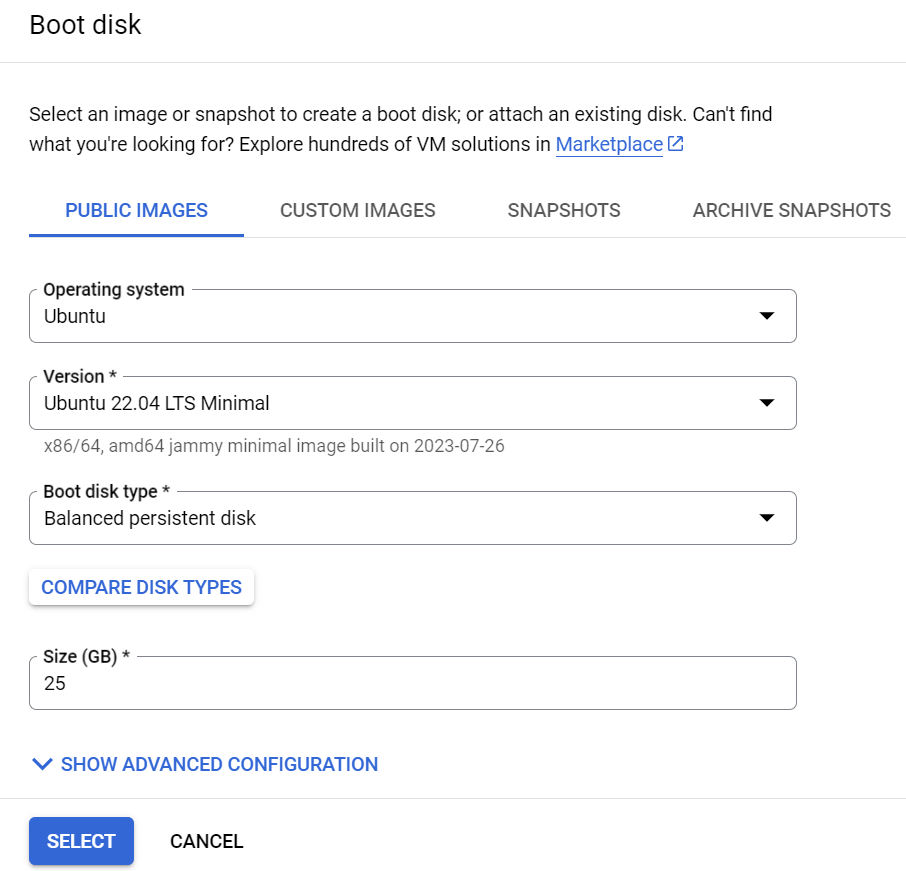


Your VM has been successfully created and is now available in the VM list. To connect to the VM using SSH, use its external IP address.




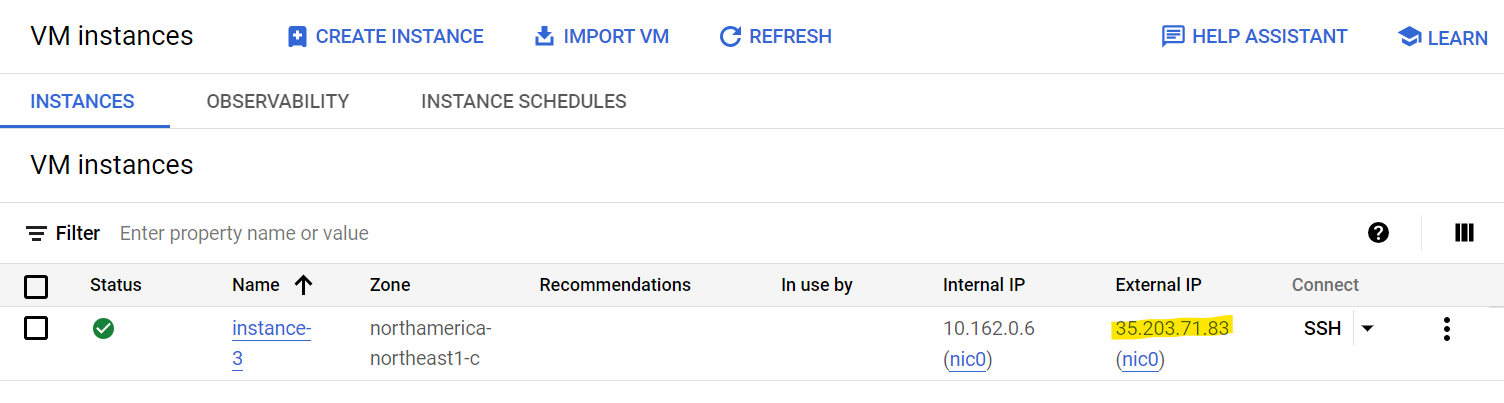


## Step 5. Creating venv on VM



Connect to the VM using SSH, and then execute the following code.

```
sudo apt update
sudo apt install python3.10-venv

python3 -m venv venv
source venv/bin/activate
pip install smartscheduler
pip install torchvision  # Installation needed for MNIST

mkdir scheduler_task # Folder for future files
```

## Step 6. Edit vm_main.py for your purposes.




Download the vm_main.py file for MNIST training from [our GitHub](https://github.com/AIRI-Institute/SmartScheduler/blob/dev_package/examples/MNIST_google_cloud/vm_main.py).

This file contains all the training process logic. You can customize the training process by selecting the appropriate callbacks, model, dataset, and adjusting other parameters as needed.


In [3]:
!wget https://raw.githubusercontent.com/AIRI-Institute/SmartScheduler/dev_package/examples/MNIST_google_cloud/vm_main.py?token=GHSAT0AAAAAACCYEQKVSCY24NTWRGHN5XOUZGMWJUQ

--2023-08-04 08:09:29--  https://raw.githubusercontent.com/AIRI-Institute/SmartScheduler/dev_package/examples/MNIST_google_cloud/vm_main.py?token=GHSAT0AAAAAACCYEQKVSCY24NTWRGHN5XOUZGMWJUQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4231 (4.1K) [text/plain]
Saving to: ‘vm_main.py?token=GHSAT0AAAAAACCYEQKVSCY24NTWRGHN5XOUZGMWJUQ’

vm_main.py?token=GH 100%[===================>]   4.13K  --.-KB/s    in 0s      

2023-08-04 08:09:29 (60.7 MB/s) - ‘vm_main.py?token=GHSAT0AAAAAACCYEQKVSCY24NTWRGHN5XOUZGMWJUQ’ saved [4231/4231]



In [4]:
!mv vm_main.py* vm_main.py

## Step 7. Copy vm_main.py to VM


```
scp vm_main.py scheduler@your_vm_ip:scheduler_task/
```

Due to the inability to use `scp` in Google Colab, we will use the `paramiko` package for file transfer and SSH operations. The `paramiko` package comes pre-installed with `SmartScheduler`, so there's no need to install it separately.


In [ ]:
vm_ip = '34.155.169.58'
username = 'scheduler'

In [ ]:
import paramiko

ssh_client = paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname='', username=username, timeout=10, port=22)
sftp = ssh_client.open_sftp()
sftp.put('vm_main.py', 'scheduler_task/vm_main.py')
ssh_client.close()

## Step 8. Run task on your Master machine


Edit the current IP address, zone, project name, and instance name to match your specific VM details. You can find this information in the Google Cloud console.

Make sure to replace the following placeholders with your actual values:

- Replace `vm_ip` with the external IP address of your VM.
- Replace `current_zone` with the zone where your VM is located.
- Replace `project_id` with the name of your Google Cloud project.
- Replace `current_instance_name` with the name of your VM instance, as listed in the Google Cloud console.

And after that you are ready to start the training!

Here we added `master_machine_main.py` from our [Github](https://github.com/AIRI-Institute/SmartScheduler/blob/dev_package/examples/MNIST_google_cloud/master_machine_main.py) into a cell.

In [1]:
vm_ip = '34.118.148.114' # your external IP here
username = 'scheduler' # your username if you changed from ours

In [3]:
import os
from pathlib import Path
from smartscheduler.master_machine.master_machine_controller import Controller
from smartscheduler.master_machine.interval_predictor import (
    CO2Predictor,
    IntervalGenerator,
)

electricity_maps_api_key = "" # your API key here
controller = Controller(
    credentials_path=Path(os.getcwd()) / "application_default_credentials.json",
    ssh_username=username,
    ssh_python_path=f"/home/{username}/venv/bin/python",
    ssh_vm_main_path=f"/home/{username}/scheduler_task/vm_main.py",
    current_vm_ip=vm_ip,
    ssh_port=22,
    current_zone="northamerica-northeast1-c", # your VM's zone
    current_instance_name="instance-1", # your VM's name
    project_id="test-smart-scheduler", # your project name
    intervals_prediction_period=3600,  # seconds
    co2_predictor=CO2Predictor(electricity_maps_api_key),
    interval_generator=IntervalGenerator(),
)


controller.start_training()
print("Successfully finished all intervals. Stopping Instance")
# controller.stop_training()

Gathering info and predicting CO2 ... This may take a while ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:12<00:00,  5.58s/it]


CO2 predicted
SSH Starting
/home/scheduler/venv/lib/python3.10/site-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(
Scheduling 2023-08-04 09:00:00+00:00 - 2023-08-05 08:00:00+00:00 job
cheduler/venv/lib/python3.10/site-packages/eco2ai/tools/tools_gpu.py:39: NoGPUWarning: 

There is no any available GPU devices or your GPU is not supported by Nvidia library!
The tracker will consider CPU usage only

  warnings.warn(message="\n\nThere is no any available GPU devices or your GPU is not supported by Nvidia library!\nThe tracker will consider CPU usage only\n",
Starting train from epoch 0, state: train,train_batch 0, val_batch 0
Val:  98%|███████████████████████████████